<a href="https://colab.research.google.com/github/AnshuKumari09/Data-Science-Interviews/blob/main/gradient_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression #make_regression ek function hai jo synthetic regression dataset banata hai — matlab ek fake data jo model training ke liye use hota hai.
#👉 Ye mainly testing aur learning purpose ke liye hota hai, real-world data nahi.Agar tum linear regression seekh rahe ho, to tumhe data chahiye jisme:
#kuch input features (X) ho,aur unke basis pe ek target (y) ho. make_regression ye dono automatically bana deta hai.

In [2]:
import numpy as np

In [3]:
X,y=make_regression(n_samples=100,n_features=1,noise=10,random_state=42)

In [4]:
print(X[:5])

[[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]


In [5]:
print(y[:5])

[ 50.77992943 -10.06527016 -34.91839191  10.52674299 -17.73837724]


n_targets=1

Matlab: 1 output variable (1D regression problem).

Agar tum n_targets=2 rakhte → multiple regression targets ban jaate.
noise=80
Matlab: target values me randomness daal do.
Ye data ko realistic banata hai kyunki real-world me values perfect line ke upar nahi hoti.Jitna bada noise, utna zyada scattered data.

In [9]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=13) #n_informative=1 Matlab: 1 feature actually target y ko affect karega. Ye useful hai agar n_features > n_informative, matlab kuch features noise ke liye hai.

In [10]:
print(X[:5])

[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]


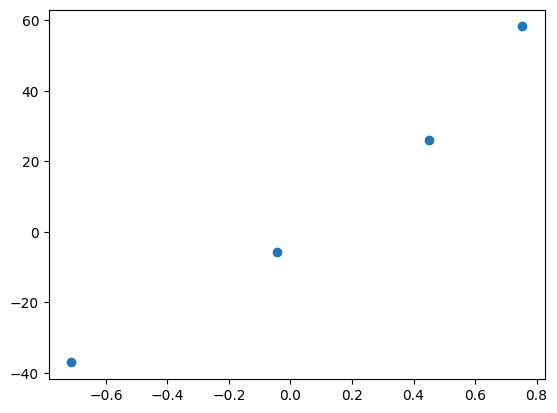

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,y)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()

Linear regression best fit line nikalta hai jo y = m*X + c ke form me hoti hai:
y=slope∗X+intercept Ye Ordinary Least Squares (OLS) regression model banata hai . reg ek fitted model object hoga jisse hum data ke upar fit karenge.

In [14]:
reg.fit(X,y)

LinearRegression()

In [16]:
reg.coef_


array([63.08504508])

Matlab: Linear regression line fit karo jo y = m*X + c ke form me ho.
Model automatically slope (coef_) aur intercept (intercept_) calculate karta hai using least squares method.

In [17]:
reg.intercept_

np.float64(3.2699541053915793)

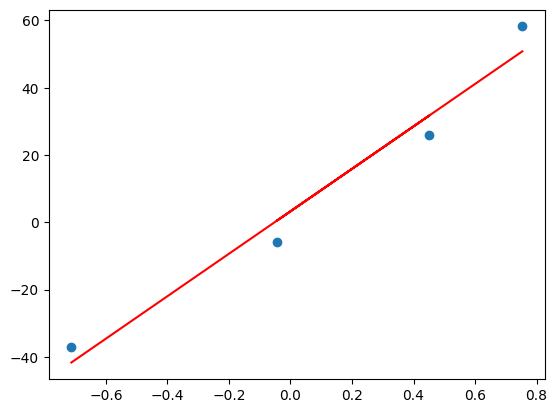

In [19]:
#y=63.08∗X+3.2
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')


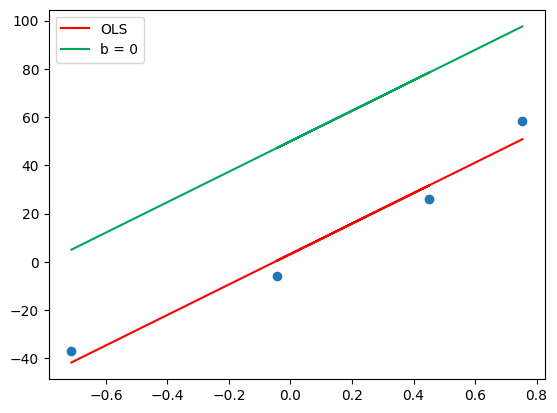

In [24]:
y_pred = ((63.08 * X) + 50).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()


Gradient Descent simulation → manually intercept/slope guess karke start karte hain, fir error function minimize karke OLS ke values ke paas le jaate hain.
Matlab, hum step by step “line adjust karna” dekh rahe hain jaise machine learning me hota hai.
Ye ek visual intuition banata hai ki slope aur intercept kaise data fit karte hain.Red line → OLS (best fit, exact slope & intercept)
Green line → starting guess for intercept = 100 (parallel, upar shift)

In [28]:
m=63.08
b=50
loss_slope = -2 * np.sum(y - m*X.ravel() - b)


In [29]:
lr = 0.1
step_size = loss_slope * lr

In [30]:
b=b-step_size
print(b)

12.616416014324095


1️⃣ Loss function in Linear Regression

Linear Regression me Mean Squared Error (MSE) hota hai:
MSE=n1i=1∑n(yi−(mXi+b))^2
y_i = actual value
m X_i + b = predicted value Ye slope of loss function hai intercept ke respect me

Agar ye positive → loss reduce karne ke liye b decrease karna padega . Agar ye negative → b increase karna padega
2️⃣ Gradient w.r.t intercept (b)

Gradient of loss with respect to b:

∂MSE/∂𝑏=−2∑n(yi−(mXi+b))
loss_slope = 590.7223659179078 Learning rate = 0.1 → gradient ko scale down kar raha hai

Step size = 590.72 * 0.1 = 59.07

Matlab, ek iteration me b ko 59.07 units adjust karenge
Positive value → b ko ghatana hoga

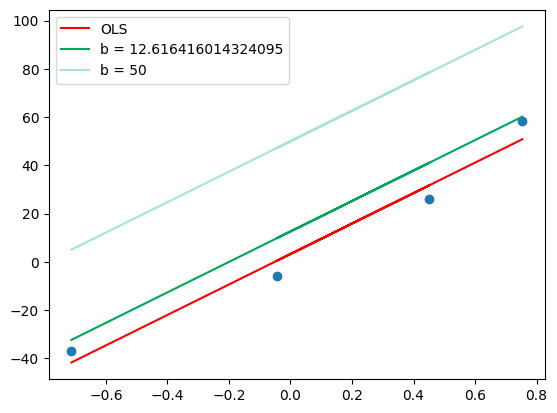

In [32]:
y_pred1 = ((63.08 * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 50')
plt.legend()
plt.show()


In [33]:

# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope


np.float64(74.76716797135178)

In [36]:
step_size = loss_slope*lr
step_size


np.float64(7.476716797135179)

In [37]:
b=b-step_size
print(b)

5.139699217188916


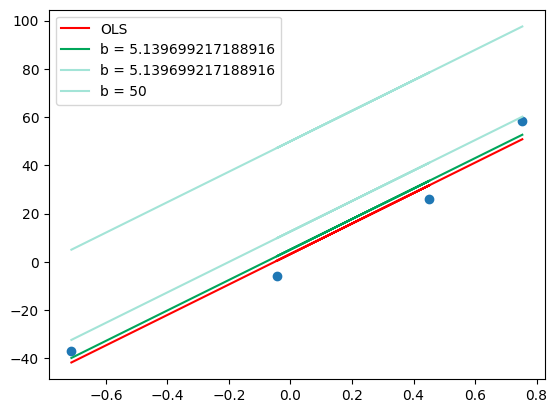

In [38]:
y_pred2 = ((63.08 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 50')
plt.legend()
plt.show()

In [39]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope


np.float64(14.953433594270347)

In [40]:
step_size = loss_slope*lr
step_size

np.float64(1.495343359427035)

In [41]:
b=b-step_size
print(b)

3.644355857761881


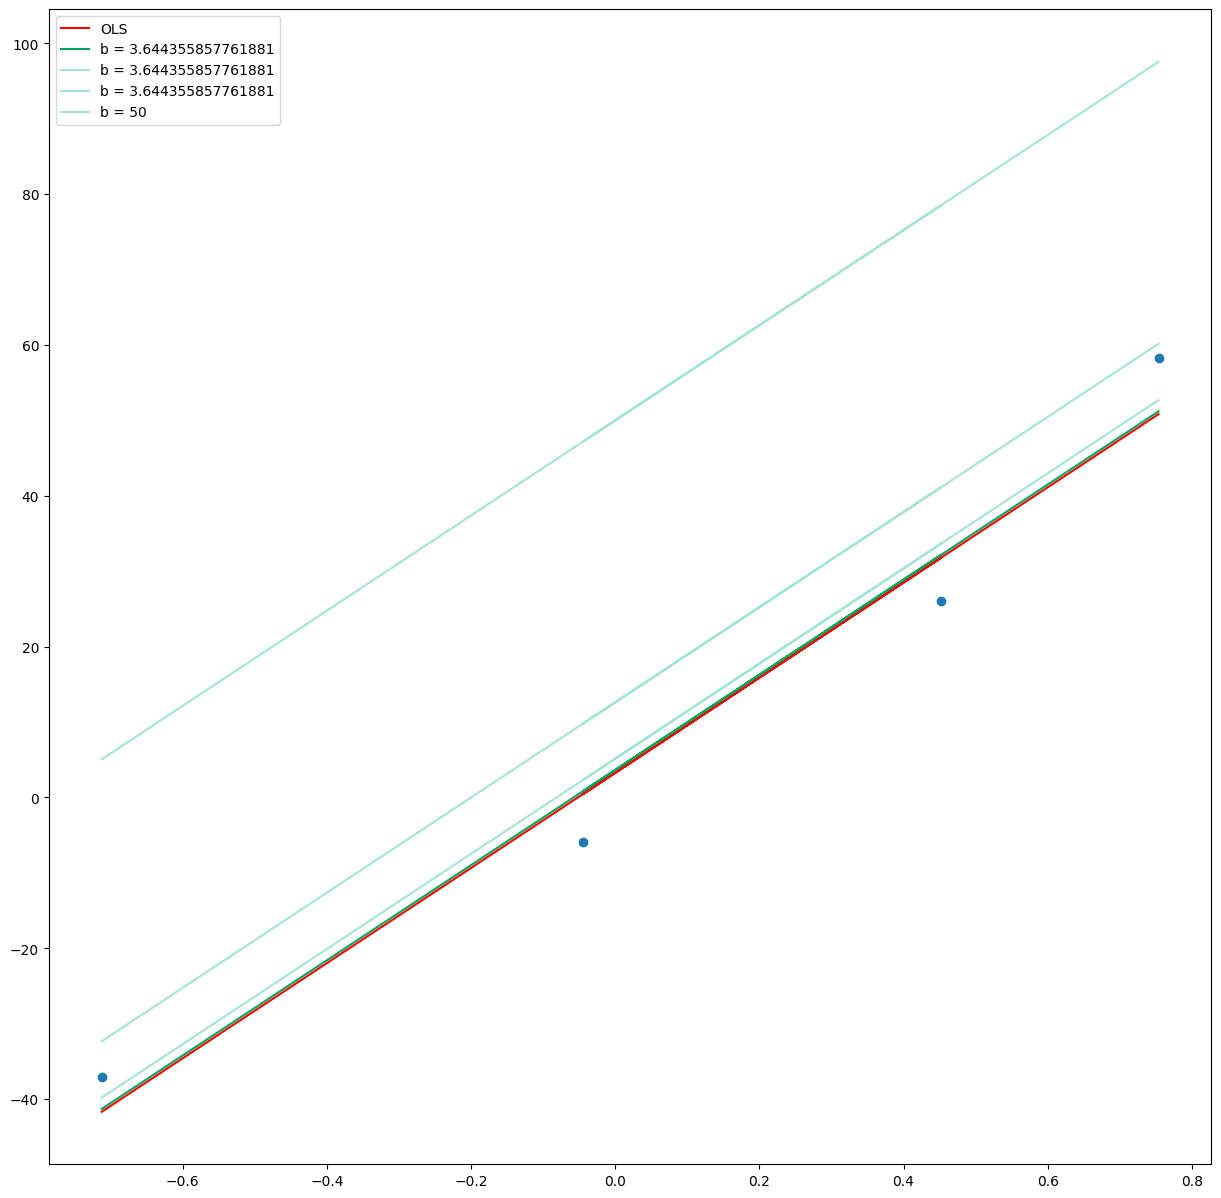

In [42]:
y_pred3 = ((63.08 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 50')
plt.legend()
plt.show()

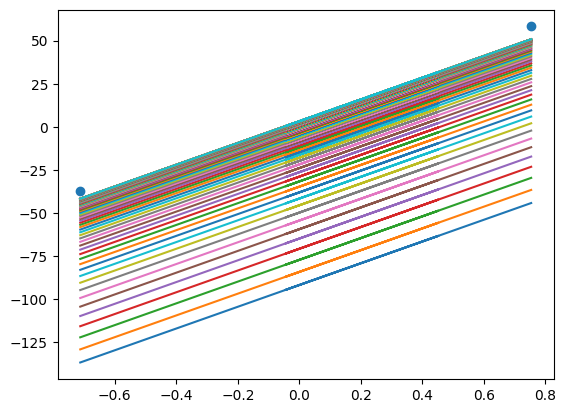

In [43]:
b = -100
m = 63.08
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

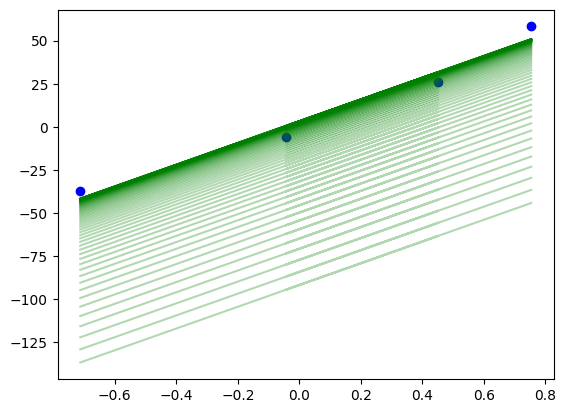

In [44]:
b = -100
m = 63.08
lr = 0.01

epochs = 100

plt.scatter(X, y, color='blue')

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b
    plt.plot(X.ravel(), y_pred, color='green', alpha=0.3)

plt.show()
